In [1]:
!pip install -r requirements.txt


[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: pip install --upgrade pip


In [57]:
import StellarRadio_nostitch
%load_ext autoreload
%autoreload 2
stellar_init = StellarRadio_nostitch.StellarRadioAlg()
stellar_init.run_all_steps()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Frequency guess: 14.187637075855344
Iteration 0
mix: 1000.0 14.187637075855344 -1.0 0.0 -0.013443589210510254 0.00013387779822817872 (0.8525742141325263-0.1274594302732979j)
0.7471811164861524 0.7297940442126322 0.017387072273520276
Amps: 1000.0 1156.8766520558418
mix: 1156.8766520558418 14.187637075855344 -1.0 0.0 -0.013443589210510254 0.00013387779822817872 (0.9863232024747772-0.1474548389675179j)
Phases: -1.0 -1.1484004384021134
mix: 1156.8766520558418 14.187637075855344 -1.1484004384021134 0.0 -0.013443589210510254 0.00013387779822817872 (0.997284507688241-2.680073976814408e-12j)
Frequencies: 14.187637075855344 14.187634369778326
Iteration 1
mix: 1156.8766520558418 14.187634369778326 -1.1484004384021134 0.0 -0.013443589210510254 0.00013387779822817872 (0.9970647938082527-0.014525490190458132j)
1.0000000386677923 0.9980266676747872 0.001973370993005099
Amps: 1156.8766520558418 1156.8766296889094


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
pickle file exists for object


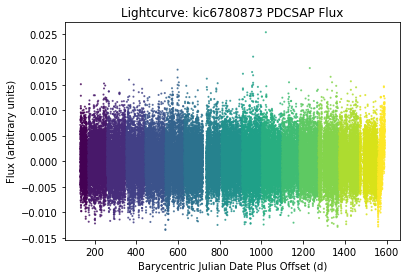

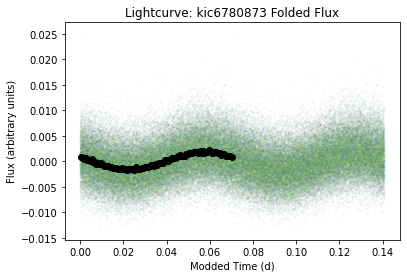

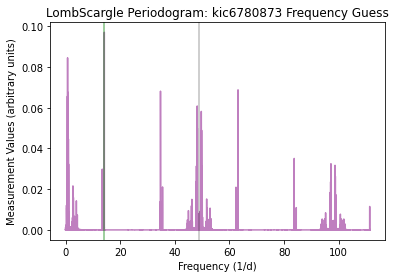

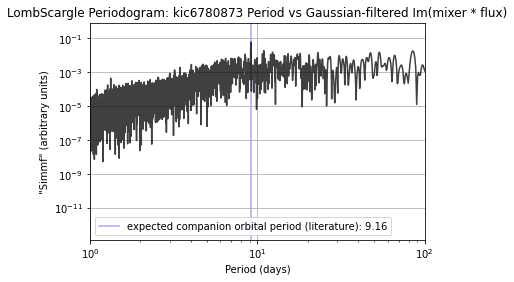

In [69]:
import StellarRadio_plotting
%load_ext autoreload
%autoreload 2
plot_init = StellarRadio_plotting.StellarRadioAlg_Plotting()
plot_init.do_plots()